In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
from scipy import stats

# MAP

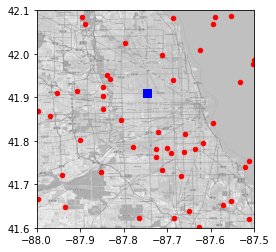

In [2]:
# https://www.kaggle.com/c/predict-west-nile-virus/
# This shows how to read the text representing a map of Chicago in numpy, and put it on a plot in matplotlib.
# This example also rescales the image data to the GPS co-ordinates of the bounding box and overlays some random points.

import numpy as np
import matplotlib.pyplot as plt

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('data/mapdata_copyright_openstreetmap_contributors.txt')


# generate some data to overlay
numPoints = 50
lats = (upperRight[0] - origin[0]) * np.random.random_sample(numPoints) + origin[0]
longs = (upperRight[1] - origin[1]) * np.random.random_sample(numPoints) + origin[1]

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs, y=lats, c='r', s=20)
plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')

#plt.show()
plt.savefig('map.png')

# <font color='red'>--------------------------------TRAIN STARTS HERE---------------------------------</font>

In [889]:
train_df.groupby(['Latitude', 'Longitude', 'Trap']).count()

,,,Date,Species,AddressAccuracy,NumMosquitos,WnvPresent
Latitude,Longitude,Trap,,,,,
41.644612,-87.604498,97,17,17,17,17,17
41.659112,-87.538693,221,112,112,112,112,112
41.662014,-87.724608,135,183,183,183,183,183
41.673408,-87.599862,115,542,542,542,542,542
41.678618,-87.559308,200,129,129,129,129,129
...,...,...,...,...,...,...,...
42.008314,-87.777921,8,139,139,139,139,139
42.009876,-87.807277,233,50,50,50,50,50
42.010412,-87.662140,18,63,63,63,63,63


In [888]:
train_df.groupby(['Latitude', 'Longitude']).count()

,,Date,Species,Trap,AddressAccuracy,NumMosquitos,WnvPresent
Latitude,Longitude,,,,,,
41.644612,-87.604498,17,17,17,17,17,17
41.659112,-87.538693,112,112,112,112,112,112
41.662014,-87.724608,183,183,183,183,183,183
41.673408,-87.599862,542,542,542,542,542,542
41.678618,-87.559308,129,129,129,129,129,129
...,...,...,...,...,...,...,...
42.008314,-87.777921,139,139,139,139,139,139
42.009876,-87.807277,50,50,50,50,50,50
42.010412,-87.662140,63,63,63,63,63,63


In [3]:
train_df = pd.read_csv('data/train.csv')
train_df.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


Text(0.5, 1.0, 'Plot with Station locations')

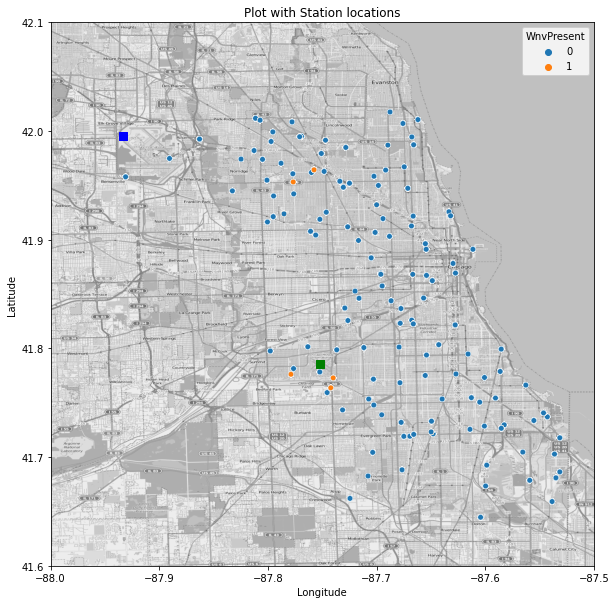

In [4]:
# https://www.kaggle.com/c/predict-west-nile-virus/
# This shows how to read the text representing a map of Chicago in numpy, and put it on a plot in matplotlib.
# This example also rescales the image data to the GPS co-ordinates of the bounding box and overlays some random points.

import numpy as np
import matplotlib.pyplot as plt

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('data/mapdata_copyright_openstreetmap_contributors.txt')


# generate some data to overlay
numPoints = 50
lats = train_df['Latitude']
longs = train_df['Longitude']

station_1 = [41.995, -87.933]  # Co-ords of station 1 (Chicago O'Hare Int'l Airport)
station_2 = [41.786, -87.752]  # Co-ords of station 2 (Chicago Midway Int'l Airport)

plt.figure(figsize=(10,10))

# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x=longs, y=lats, 
                c='r', 
                hue=train_df['WnvPresent'], 
                s=30)
plt.scatter(x=station_1[1], y=station_1[0], c='b', s=60, marker='s')
plt.scatter(x=station_2[1], y=station_2[0], c='g', s=60, marker='s')

# plt.show()
plt.savefig('map.png')
plt.title('Plot with Station locations')


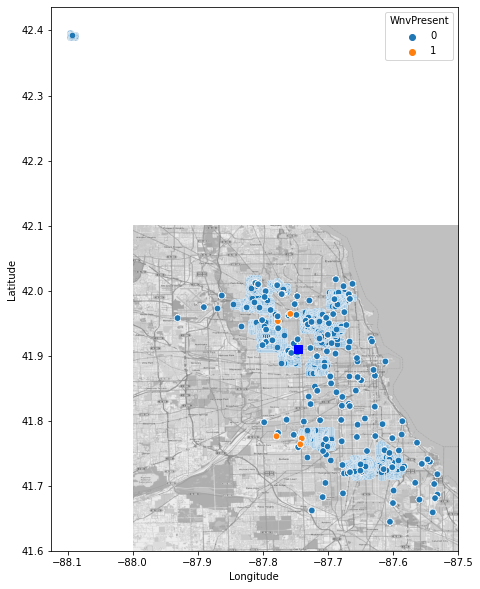

In [571]:
# https://www.kaggle.com/c/predict-west-nile-virus/
# This shows how to read the text representing a map of Chicago in numpy, and put it on a plot in matplotlib.
# This example also rescales the image data to the GPS co-ordinates of the bounding box and overlays some random points.

import numpy as np
import matplotlib.pyplot as plt

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('data/mapdata_copyright_openstreetmap_contributors.txt')


# generate some data to overlay
numPoints = 300
lats = spray_df['Latitude']
longs = spray_df['Longitude']
# wnv = spray_df['WnvPresent']
lats_2 = train_df['Latitude']
longs_2 = train_df['Longitude']

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

plt.figure(figsize=(10,10))

# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x=longs, y=lats, 
#                 c='r', 
#                 hue=wnv, 
                s=40)
sns.scatterplot(x=longs_2, y=lats_2, 
                c='r', 
                hue=wnv, 
                s=40)
plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')

#plt.show()
plt.savefig('map.png')


In [6]:
train_df['AddressAccuracy'].value_counts()

8    4628
9    3980
5    1807
3      91
Name: AddressAccuracy, dtype: int64

In [7]:
train_df.shape

(10506, 12)

In [8]:
train_df['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

## <font color='red'>DONE: Convert 'Date' to Datetime format</font>

In [9]:
# Before:
train_df.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [10]:
# After:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

## <font color='red'>DONE: Convert 'Trap' from string to integer.</font>
<font color='blue'>Since the stuff with alphabets at the back is a satellite of an area, I stripped off the letters and combined them with their main area</font>

In [11]:
train_df['Trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [12]:
def trap_digits(row):
    row['Trap'] = int(
        re.sub(
            pattern='\D+', 
            repl='', 
            string=row['Trap']))
    return row
train_df = train_df.apply(trap_digits, axis=1)

In [13]:
train_df.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                               int64
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

## <font color='red'>DONE: Dropping Address, Block, Street, AddressNumberAndStreet</font>
<font color='blue'>Since we have lat/long, we don't really need the other human details</font>

In [14]:
train_df.drop(columns=['Address', 'Block', 'Street', 'AddressNumberAndStreet'], inplace=True)
train_df.head(3)

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,2,41.954690,-87.800991,9,1,0
1,2007-05-29,CULEX RESTUANS,2,41.954690,-87.800991,9,1,0
2,2007-05-29,CULEX RESTUANS,7,41.994991,-87.769279,9,1,0


In [15]:
train_df.dtypes

Date               datetime64[ns]
Species                    object
Trap                        int64
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

## <font color='red'>INCOMPLETE: Adding number of mosquitos. If NumMosquitos > 50, another row is made</font>
<font color='blue'>So we need to add the number of mosquitos first before dropping</font>

In [16]:
train_df.loc[(train_df['Date'] == '2013-08-15') & (train_df['Trap'] == 235)]

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
9702,2013-08-15,CULEX PIPIENS/RESTUANS,235,41.776428,-87.627096,8,34,1
9703,2013-08-15,CULEX RESTUANS,235,41.776428,-87.627096,8,7,1
9704,2013-08-15,CULEX PIPIENS,235,41.776428,-87.627096,8,3,0


In [17]:
print(train_df.iloc[[9702]]['Longitude'])

9702   -87.627096
Name: Longitude, dtype: float64


In [18]:
print(train_df.iloc[[9703]]['Longitude'])

9703   -87.627096
Name: Longitude, dtype: float64


In [19]:
train_df.dtypes

Date               datetime64[ns]
Species                    object
Trap                        int64
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [20]:
train_df.loc[(train_df['Date'] == '2007-07-11') & (train_df['Trap'] == 86) & (train_df['Latitude'] == 41.688324)]

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
293,2007-07-11,CULEX PIPIENS/RESTUANS,86,41.688324,-87.676709,8,50,0
294,2007-07-11,CULEX PIPIENS/RESTUANS,86,41.688324,-87.676709,8,35,0
295,2007-07-11,CULEX PIPIENS/RESTUANS,86,41.688324,-87.676709,8,50,0
296,2007-07-11,CULEX PIPIENS/RESTUANS,86,41.688324,-87.676709,8,8,0
297,2007-07-11,CULEX RESTUANS,86,41.688324,-87.676709,8,1,0
298,2007-07-11,CULEX RESTUANS,86,41.688324,-87.676709,8,8,0
299,2007-07-11,CULEX PIPIENS,86,41.688324,-87.676709,8,19,0
300,2007-07-11,CULEX SALINARIUS,86,41.688324,-87.676709,8,2,0
301,2007-07-11,CULEX TERRITANS,86,41.688324,-87.676709,8,1,0


In [21]:
train_df.loc[train_df['NumMosquitos'] == 50, :]

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
293,2007-07-11,CULEX PIPIENS/RESTUANS,86,41.688324,-87.676709,8,50,0
295,2007-07-11,CULEX PIPIENS/RESTUANS,86,41.688324,-87.676709,8,50,0
350,2007-07-11,CULEX PIPIENS/RESTUANS,158,41.682587,-87.707973,9,50,0
351,2007-07-11,CULEX PIPIENS/RESTUANS,158,41.682587,-87.707973,9,50,0
353,2007-07-11,CULEX PIPIENS/RESTUANS,158,41.682587,-87.707973,9,50,0
...,...,...,...,...,...,...,...,...
10240,2013-09-12,CULEX PIPIENS/RESTUANS,115,41.673408,-87.599862,5,50,1
10242,2013-09-12,CULEX PIPIENS/RESTUANS,115,41.673408,-87.599862,5,50,0
10259,2013-09-12,CULEX PIPIENS/RESTUANS,900,41.974689,-87.890615,9,50,0
10262,2013-09-12,CULEX PIPIENS/RESTUANS,900,41.974689,-87.890615,9,50,0


In [22]:
train_df.loc[train_df.duplicated(subset=['Date', 'Latitude', 'Longitude', 'Trap'])].sort_values(['Date', 'Latitude'])

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
14,2007-05-29,CULEX RESTUANS,86,41.688324,-87.676709,8,1,0
18,2007-05-29,CULEX PIPIENS,96,41.731922,-87.677512,8,1,0
8,2007-05-29,CULEX RESTUANS,48,41.867108,-87.654224,8,2,0
20,2007-05-29,CULEX RESTUANS,129,41.891126,-87.611560,5,2,0
12,2007-05-29,CULEX RESTUANS,54,41.921965,-87.632085,8,3,0
...,...,...,...,...,...,...,...,...
10485,2013-09-26,CULEX PIPIENS/RESTUANS,900,41.974689,-87.890615,9,4,0
10486,2013-09-26,CULEX PIPIENS,900,41.974689,-87.890615,9,16,0
10487,2013-09-26,CULEX PIPIENS,900,41.974689,-87.890615,9,9,0
10488,2013-09-26,CULEX PIPIENS,900,41.974689,-87.890615,9,11,0


In [23]:
train_df.loc[train_df['Trap'] == 900, ['Date', 'Longitude', 'Latitude', 'Trap']].sort_values('Latitude')

,Date,Longitude,Latitude,Trap
3868,2009-05-28,-87.890615,41.974689,900
8020,2011-09-23,-87.890615,41.974689,900
8021,2011-09-23,-87.890615,41.974689,900
8022,2011-09-23,-87.890615,41.974689,900
8023,2011-09-23,-87.890615,41.974689,900
...,...,...,...,...
5848,2009-09-17,-87.890615,41.974689,900
5849,2009-09-17,-87.890615,41.974689,900
5962,2009-09-25,-87.890615,41.974689,900
5725,2009-09-14,-87.890615,41.974689,900


In [24]:
train_df.loc[train_df.duplicated(
    subset=['Date', 'Latitude', 'Longitude', 'Trap', 'AddressAccuracy', 'WnvPresent']),:
            ].groupby(
    ['Trap', 'Date', 'Latitude', 'Longitude', 'AddressAccuracy', 'WnvPresent']).sum(
).sort_values(by=['Date', 'Latitude', 'Longitude'], ascending=False)


NumMosquitos
Trap Date       Latitude  Longitude  AddressAccuracy WnvPresent              
900  2013-09-26 41.974689 -87.890615 9               0                     37
223  2013-09-26 41.973845 -87.805059 9               0                      1
2    2013-09-26 41.954690 -87.800991 9               0                      8
11   2013-09-26 41.944869 -87.832763 8               0                      2
54   2013-09-26 41.921965 -87.632085 8               0                     17
...                                                                       ...
     2007-05-29 41.921965 -87.632085 8               0                      3
129  2007-05-29 41.891126 -87.611560 5               0                      2
48   2007-05-29 41.867108 -87.654224 8               0                      2
96   2007-05-29 41.731922 -87.677512 8               0                      1
86   2007-05-29 41.688324 -87.676709 8               0                      1

[2882 rows x 1 columns]

In [572]:
train_df[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by='Species').count()

,NumMosquitos,WnvPresent
Species,,
CULEX ERRATICUS,1,1
CULEX PIPIENS,2699,2699
CULEX PIPIENS/RESTUANS,4752,4752
CULEX RESTUANS,2740,2740
CULEX SALINARIUS,86,86
CULEX TARSALIS,6,6
CULEX TERRITANS,222,222


In [575]:
train_df.groupby('Species').count()[['WnvPresent', '']]

Species
CULEX ERRATICUS              1
CULEX PIPIENS             2699
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX TERRITANS            222
Name: WnvPresent, dtype: int64

# <font color='red'>------------------------------TEST STARTS HERE------------------------------</font>

In [26]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


# <font color='red'>------------------------------WEATHER STARTS HERE------------------------------</font>

In [678]:
weather_df = pd.read_csv('data/weather.csv')
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [679]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

## <font color='red'>DONE: Change Date from string to datetime</font>

In [680]:
weather_df.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [681]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                object
Heat                   object
Cool                   object
Sunrise                object
Sunset                 object
CodeSum                object
Depth                  object
Water1                 object
SnowFall               object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object

## <font color='red'>Drop columns</font>

    Columns to drop:
    - Depth: All '0' for Station 1, All 'M' for Station 2.
    - Water1: All 'M' for both Station 1 and 2.
    - SnowFall: 99.6% of data is basically 'not Present'.

In [682]:
weather_df.shape

(2944, 22)

In [684]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [685]:
weather_df.drop(columns=['Heat', 'Cool', 'Depth', 'Water1', 'SnowFall'], inplace=True)
weather_df.shape

(2944, 17)

## <font color='red'>DONE: Dummify CodeSum</font>


In [625]:
# This is the original unique values of CodeSum
weather_df['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [626]:
# This splits and rejoins based on regex.
def codesum(row):
    row['CodeSum'] = ' '.join(re.findall('[A-Z][A-Z]\+?', row['CodeSum']))
    return row

In [686]:
weather_df = weather_df.apply(codesum, axis=1)

In [687]:
# Check if split and rejoin is done correctly.
weather_df['CodeSum'].unique()

array(['', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TS RA RA BR', 'RA VC TS',
       'TS RA RA', 'RA HZ', 'TS RA RA BR HZ', 'TS RA BR HZ',
       'RA BR HZ VC TS', 'TS RA RA HZ', 'TS RA BR HZ VC TS', 'TS RA',
       'TS RA BR HZ FU', 'TS RA RA HZ FU', 'BR HZ FU', 'TS RA RA VC TS',
       'HZ VC TS', 'TS RA HZ', 'VC TS', 'RA BR VC TS',
       'TS RA RA BR VC TS', 'TS TS RA RA BR HZ VC TS', 'DZ BR',
       'TS TS RA RA BR HZ', 'TS TS RA BR HZ', 'RA BR HZ',
       'TS RA RA DZ BR HZ', 'TS TS RA RA BR', 'TS RA BR', 'TS TS RA RA',
       'TS TS RA RA BR VC TS', 'TS TS RA BR', 'RA BC FG BR',
       'RA DZ FG+ BC FG BR', 'RA FG+ MI FG BR', 'RA DZ', 'RA DZ BR',
       'TS TS RA RA HZ', 'TS RA RA FG+ FG BR', 'TS RA DZ FG+ FG BR HZ',
       'TS BR', 'RA BR SQ', 'TS TS RA', 'TS RA RA BR HZ VC TS',
       'BR VC TS', 'TS', 'FG+ BR HZ', 'RA SN', 'TS RA RA DZ BR',
       'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ', 'FG+ BR', 'FG+ FG BR',
       'FG+ MI FG BR', 'TS RA RA FG BR', 'TS RA FG+ BR', 'RA DZ BR HZ

## <font color='red'>We should split it starting here.</font>

In [688]:
# Split weather data based on Station
weather_df_1 = weather_df.loc[weather_df['Station'] == 1]
weather_df_1.reset_index(inplace=True, drop=True)
weather_df_2 = weather_df.loc[weather_df['Station'] == 2]
weather_df_2.reset_index(inplace=True, drop=True)

## <font color='red'>NEXT: We want to combine Station 1 and Station 2 data so that we only use one Station data.</font>

    
    Step 1. Drop columns
    - Station: This is a combined station, so we don't need to label Station
    - Depth: All '0' for Station 1, All 'M' for Station 2.
    - Water1: All 'M' for both Station 1 and 2.
    
    Step 2. Only take Station 1 values
    - Depart: Take Station 1 'Depart' values. Station 2 'Depart' values are all 'M', whereas Station 1 are ints.
    - Sunrise & Sunset: All data are '-' for Station 2.

    Step 3. Replace 'M' with np.nan for these rows:

    Step 4. Average of both stations
    - Tmax/Tmin/Tavg
    - DewPoint
    - Date I guess...
    - ResultSpeed
    - ResultDir
    
    Step 5. Values with 'M': Change 'M' into np.nan, then use:
    pd.concat([random_df_1, random_df_2]).groupby(level=0).mean()
    - WetBulb: 3 Missing values for Station 1, 1 Missing for Station 2. All different dates missing. 
    - Heat: 11 Missing for Station 2.
    - Cool: 11 Missing for Station 2.
    - SeaLevel: 5 Missing for Station 1. 4 Missing for Station 2. ALL missing on DIFFERENT DATES
    - AvgSpeed: 3 'M' for for Station 2.
    
    Step 6. Take data from Station 1 ONLY. No data for Station 2
    - SnowFall: All data are 'M' for Station 2. Also, Data is either '0.0', '  T' or '0.1' in Station 2. Should change 'T' into something else. Probably can binarize it.
    
    Step 7. Incompatible values
    - CodeSum: Values are different (str) for Station 1 and 2. Should we combine?
    
    Step 8. Multiple permutations
    - PrecipTotal: Station 2 has 'M' values, Station 1 does not. On some days, both Stations have '  T' for both stations. Might be reasonable to impute as 0.01
    - StnPressure: 2 Missing Value for Station 1 and 2 EACH. 1 of the missing values are on the same day (2013-08-10). Consider imputing somehow. Probably just the mean, a linreg imputation would be kinda overkill.
    

### <font color='red'>!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!SPLIT WEATHER TO WEATHER 1 AND WEATHER 2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</font>

In [689]:
weather_df_2['AvgSpeed'].unique()

array(['9.6', '13.4', '13.2', '10.4', '11.5', '14.5', '9.9', '5.4', '5.9',
       '3.9', '12.8', '13.0', '7.6', '14.6', '10.8', '11.8', '12.2',
       '5.5', '11.4', '9.7', '7.8', '10.6', '11.2', '15.2', '8.2', '9.2',
       '5.2', '7.4', '10.1', '5.8', '7.2', '8.1', '20.7', '12.4', '4.7',
       '8.4', '10.0', 'M', '6.4', '4.1', '6.1', '12.6', '11.3', '7.7',
       '6.0', '8.5', '13.3', '6.2', '8.8', '6.9', '12.7', '10.2', '13.9',
       '6.5', '6.6', '14.4', '3.5', '4.9', '7.0', '10.7', '4.6', '5.0',
       '3.7', '6.3', '9.0', '7.1', '5.7', '7.5', '9.1', '7.3', '8.3',
       '10.9', '4.4', '6.7', '9.4', '13.7', '11.0', '10.5', '8.9', '10.3',
       '15.5', '17.2', '18.0', '11.7', '16.8', '7.9', '17.3', '14.7',
       '9.3', '15.0', '5.6', '11.1', '17.8', '14.1', '12.0', '17.4',
       '3.8', '12.3', '4.3', '13.8', '19.5', '15.1', '13.5', '8.6', '8.0',
       '6.8', '3.6', '4.0', '13.1', '9.5', '3.2', '4.5', '12.1', '3.1',
       '4.8', '8.7', '5.3', '18.4', '14.8', '2.6', '4.2', '2.

In [690]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Sunrise', 'Sunset', 'CodeSum', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [700]:
# Create third df for weather with the same column names as df 1 and 2. 
# We're gonna make this our main weather dataframe.

# Step 1: Drop columns
weather_df_3 = pd.DataFrame()

In [712]:
# Step 2.: Replace 'M' with np.nan for these rows: WetBulb, Heat, Cool, SeaLevel, AvgSpeed.

weather_df_1.replace(to_replace='M', method='ffill', inplace=True)
weather_df_2.replace(to_replace='M', method='ffill', inplace=True)

# weather_df_1['WetBulb'].replace('M', np.nan, inplace=True)
# weather_df_1['Heat'].replace('M', np.nan, inplace=True)
# weather_df_1['Cool'].replace('M', np.nan, inplace=True)
# weather_df_1['SeaLevel'].replace('M', np.nan, inplace=True)
# weather_df_1['AvgSpeed'].replace('M', np.nan, inplace=True)

# weather_df_2['WetBulb'].replace('M', np.nan, inplace=True)
# weather_df_2['Heat'].replace('M', np.nan, inplace=True)
# weather_df_2['Cool'].replace('M', np.nan, inplace=True)
# weather_df_2['SeaLevel'].replace('M', np.nan, inplace=True)
# weather_df_2['AvgSpeed'].replace('M', np.nan, inplace=True)

# # Step 5. Replace '  T' with 0.005, Replace 'M' with np.nan. Change into numeric.
weather_df_1.loc[weather_df_1['PrecipTotal'] == '  T', ['PrecipTotal']] = 0.005
weather_df_1['PrecipTotal'] = pd.to_numeric(weather_df_1['PrecipTotal'])

# weather_df_2.loc[weather_df_2['PrecipTotal'] == 'M', ['PrecipTotal']] = np.nan
weather_df_2.loc[weather_df_2['PrecipTotal'] == '  T', ['PrecipTotal']] = 0.005
weather_df_2['PrecipTotal'] = pd.to_numeric(weather_df_2['PrecipTotal'])

# weather_df_1.loc[weather_df_1['StnPressure'] == 'M', ['StnPressure']] = np.nan
weather_df_1['StnPressure'] = pd.to_numeric(weather_df_1['StnPressure'])
# weather_df_1.loc[weather_df_1['StnPressure'].isnull(), ['StnPressure']] = weather_df_1['StnPressure'].mean()

# weather_df_2.loc[weather_df_2['StnPressure'] == 'M', ['StnPressure']] = np.nan
weather_df_2['StnPressure'] = pd.to_numeric(weather_df_2['StnPressure'])
# weather_df_2.loc[weather_df_2['StnPressure'].isnull(), ['StnPressure']] = weather_df_2['StnPressure'].mean()

weather_df_1['WetBulb'] = pd.to_numeric(weather_df_1['WetBulb'])
weather_df_2['WetBulb'] = pd.to_numeric(weather_df_2['WetBulb'])

weather_df_1['SeaLevel'] = pd.to_numeric(weather_df_1['SeaLevel'])
weather_df_2['SeaLevel'] = pd.to_numeric(weather_df_2['SeaLevel'])

weather_df_1['AvgSpeed'] = pd.to_numeric(weather_df_1['AvgSpeed'])
weather_df_2['AvgSpeed'] = pd.to_numeric(weather_df_2['AvgSpeed'])

<ipython-input-712-57e686b80d6b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_1['PrecipTotal'] = pd.to_numeric(weather_df_1['PrecipTotal'])
<ipython-input-712-57e686b80d6b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_2['PrecipTotal'] = pd.to_numeric(weather_df_2['PrecipTotal'])
<ipython-input-712-57e686b80d6b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [713]:
weather_df_1.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                 int64
Sunrise                object
Sunset                 object
CodeSum                object
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

In [398]:
weather_df['SnowFall'].value_counts(normalize=True)

M      0.500000
0.0    0.495584
  T    0.004076
0.1    0.000340
Name: SnowFall, dtype: float64

In [309]:
weather_df_2.loc[weather_df_2['Heat'] == 'M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,FG+,FU,GR,HZ,MI,RA,SN,SQ,TS,VC
3,2,2007-05-04,78,51,M,M,42,50,M,M,...,0,0,0,0,0,0,0,0,0,0
252,2,2008-07-08,86,46,M,M,68,71,M,M,...,0,0,0,0,0,1,0,0,1,0
337,2,2008-10-01,62,46,M,M,41,47,M,M,...,0,0,0,0,0,0,0,0,0,0
818,2,2011-07-22,100,71,M,M,70,74,M,M,...,0,0,0,0,0,1,0,0,1,0
1033,2,2012-08-22,84,72,M,M,51,61,M,M,...,0,0,0,0,0,0,0,0,0,0
1105,2,2013-05-02,71,42,M,M,39,45,M,M,...,0,0,0,0,0,0,0,0,0,0
1250,2,2013-09-24,91,52,M,M,48,54,M,M,...,0,0,0,0,0,0,0,0,0,0
1255,2,2013-09-29,84,53,M,M,48,54,M,M,...,0,0,0,0,0,1,0,0,0,0
1262,2,2013-10-06,76,48,M,M,44,50,M,M,...,0,0,0,0,0,1,0,0,0,0
1289,2,2014-05-02,80,47,M,M,43,47,M,M,...,0,0,0,0,0,1,0,0,0,0


In [877]:
def weather_combined(row, row_1, row_2):

    # Step 3: Take mean of both Stations
    row['Date'] = row_1['Date']
    row['Tmax'] = pd.concat([row_1['Tmax'], row_2['Tmax']]).groupby(level=0).mean()
    row['Tmin'] = pd.concat([row_1['Tmin'], row_2['Tmin']]).groupby(level=0).mean()
    row['Tavg'] = (row['Tmax'] + row['Tmin']) / 2
    row['TempDiff'] = row['Tavg'] - 65
    row['ResultSpeed'] = pd.concat([row_1['ResultSpeed'], row_2['ResultSpeed']]).groupby(level=0).mean()
    row['ResultDir'] = pd.concat([row_1['ResultDir'], row_2['ResultDir']]).groupby(level=0).mean()
    
    row['WetBulb'] = pd.concat([row_1['WetBulb'], row_2['WetBulb']]).groupby(level=0).mean()
#     row['Heat'] = pd.concat([row_1['Tmin'], row_2['Tmin']]).groupby(level=0).mean()
#     row['Cool'] = pd.concat([row_1['Tmin'], row_2['Tmin']]).groupby(level=0).mean()
    row['SeaLevel'] = pd.concat([row_1['SeaLevel'], row_2['SeaLevel']]).groupby(level=0).mean()
    row['AvgSpeed'] = pd.concat([row_1['AvgSpeed'], row_2['AvgSpeed']]).groupby(level=0).mean()
    
    # Step 4: Only take Station 1 values
    row['Depart'] = pd.to_numeric(row_1['Depart'])  
    row['Sunrise'] = pd.to_datetime(row_1['Sunrise'], format='%H%M', exact=True).dt.time
    row['Sunset'] = pd.to_datetime(row_1['Sunset'], format='%H%M', exact=False).dt.time
    # Step 5:
    row['PrecipTotal'] = pd.concat([row_1['PrecipTotal'], row_2['PrecipTotal']]).groupby(level=0).mean()
    row['StnPressure'] = pd.concat([row_1['StnPressure'], row_2['StnPressure']]).groupby(level=0).mean()

    # Step 6:
    row['CodeSum'] = row_1['CodeSum'] + ' ' + row_2['CodeSum']

    row['Fog'].iloc[row.loc[row['CodeSum'].str.contains('FG', 'FG+') == True, ['CodeSum']].index] = 1
#     row['Thunder'].iloc[row.loc[row['CodeSum'].str.contains('TS') == True, ['CodeSum']].index] = 1
    
    if 'TS' in row['CodeSum']:
        row['Thunder'] = 1 
    
    return row

weather_df_3 = weather_combined(weather_df_3, weather_df_1, weather_df_2)


/Users/edwardnathanael/opt/anaconda3/envs/dsi24/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [843]:
for observation in weather_df_3['CodeSum']:
    if 'FG' in observation:
        weather_df_3['Fog'] = 1
    else:
        weather_df_3['Fog'] = 0

In [878]:
weather_df_3['Thunder'].sum()

0

In [872]:
weather_df_3['CodeSum'].str.contains('TS').sum()

231

In [859]:
weather_df_3['Fog'].sum()

33

In [870]:
weather_df_3.dtypes

Date           datetime64[ns]
Tmax                  float64
Tmin                  float64
Tavg                  float64
ResultSpeed           float64
ResultDir             float64
TempDiff              float64
WetBulb               float64
SeaLevel              float64
AvgSpeed              float64
Depart                  int64
PrecipTotal           float64
StnPressure           float64
CodeSum                object
Sunset                 object
Sunrise                object
Fog                     int64
Thunder                 int64
dtype: object

In [788]:
weather_df_1[['Sunset']]

,Sunset
0,1849
1,1850
2,1851
3,1852
4,1853
...,...
1467,1653
1468,1651
1469,1650
1470,1649


In [800]:
pd.to_datetime(weather_df_1['Sunset'], format='%H%M', exact=False).dt.time

0       18:49:00
1       18:50:00
2       18:51:00
3       18:52:00
4       18:53:00
          ...   
1467    16:53:00
1468    16:51:00
1469    16:50:00
1470    16:49:00
1471    16:47:00
Name: Sunset, Length: 1472, dtype: object

In [786]:
another_one.sort_values()

1462    16:06:00
1278    16:06:00
1094    16:06:00
910     16:06:00
726     16:06:00
          ...   
1350    19:31:00
1349    19:31:00
1348    19:31:00
1164    19:31:00
1347    19:31:00
Name: Sunset, Length: 1472, dtype: object

In [781]:
weather_df_1.iloc[[1426, 1462]]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1426,1,2014-09-16,68,44,56,-8,43,50,0532,1760,,0.0,29.41,30.15,3.0,30,4.4
1462,1,2014-10-22,56,35,46,-4,38,43,0612,1660,,0.0,29.56,30.30,2.9,8,4.8


In [784]:
pd.to_datetime(weather_df_1['Sunrise'], format='%H%M').dt.time

0       04:48:00
1       04:47:00
2       04:46:00
3       04:44:00
4       04:43:00
          ...   
1467    06:18:00
1468    06:19:00
1469    06:20:00
1470    06:22:00
1471    06:23:00
Name: Sunrise, Length: 1472, dtype: object

In [768]:
weather_df_1['Sunset'].unique()

array(['1849', '1850', '1851', '1852', '1853', '1855', '1856', '1857',
       '1858', '1859', '1860', '1901', '1902', '1903', '1904', '1905',
       '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913',
       '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921',
       '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929',
       '1930', '1931', '1900', '1854', '1848', '1846', '1845', '1843',
       '1842', '1840', '1839', '1837', '1835', '1834', '1832', '1831',
       '1829', '1827', '1826', '1824', '1822', '1821', '1819', '1817',
       '1815', '1814', '1812', '1810', '1809', '1807', '1805', '1803',
       '1760', '1758', '1756', '1755', '1753', '1751', '1749', '1748',
       '1746', '1744', '1742', '1741', '1739', '1737', '1735', '1734',
       '1732', '1730', '1729', '1727', '1725', '1724', '1722', '1720',
       '1719', '1717', '1715', '1714', '1712', '1711', '1709', '1707',
       '1706', '1704', '1703', '1701', '1660', '1658', '1657', '1656',
      

In [762]:
weather_df_1['Sunrise'].unique()

array(['0448', '0447', '0446', '0444', '0443', '0442', '0441', '0439',
       '0438', '0437', '0436', '0435', '0434', '0433', '0432', '0431',
       '0430', '0429', '0428', '0427', '0426', '0425', '0424', '0423',
       '0422', '0421', '0420', '0419', '0418', '0417', '0416', '0440',
       '0445', '0449', '0450', '0451', '0452', '0453', '0454', '0455',
       '0456', '0457', '0458', '0459', '0500', '0501', '0502', '0503',
       '0504', '0505', '0506', '0508', '0509', '0510', '0511', '0512',
       '0513', '0514', '0515', '0516', '0517', '0518', '0519', '0520',
       '0521', '0522', '0523', '0524', '0525', '0526', '0527', '0528',
       '0529', '0530', '0531', '0532', '0533', '0535', '0536', '0537',
       '0538', '0539', '0540', '0541', '0542', '0543', '0544', '0545',
       '0546', '0547', '0548', '0549', '0550', '0552', '0553', '0554',
       '0555', '0556', '0557', '0558', '0559', '0600', '0602', '0603',
       '0604', '0605', '0606', '0607', '0608', '0610', '0611', '0612',
      

### <font color='red'>PrecipTotal: Trace means <0.01 inch </font>
**[SOURCE LINK](https://www.thoughtco.com/measuring-precipitation-1435346)**

# <font color='red'>--------------------------------SPRAY STARTS HERE---------------------------------</font>

In [45]:
spray_df = pd.read_csv('data/spray.csv')
print(spray_df.dtypes, '\n')
print(spray_df.shape, '\n')
print(spray_df.isnull().sum())

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object 

(14835, 4) 

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64


## <font color='red'>DONE: Convert 'Date' and 'Time' from string to datetime. </font>
<font color='blue'>Note that 'Time' has been converted into datetime type but is not datetime64[ns], so it shows as object</font>

In [46]:
spray_df['Date'] = pd.to_datetime(spray_df['Date'])
spray_df['Time'] = pd.to_datetime(spray_df['Time'], format='%I:%M:%S %p').dt.time
spray_df.dtypes

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object

## <font color='red'>DONE: Drop where all full duplicates. 541 rows dropped</font>

In [47]:
# These are the rows dropped
spray_df.loc[spray_df.duplicated()].value_counts()

Date        Time      Latitude   Longitude 
2011-09-07  19:44:32  41.986460  -87.794225    540
            19:43:40  41.983917  -87.793088      1
dtype: int64

In [48]:
spray_df = spray_df.drop_duplicates(keep='first')
spray_df.reset_index(inplace=True, drop=True)
spray_df.shape

(14294, 4)

## <font color='red'>DONE: Dropping Time since Date is more important, and time doesn't seem to be usable.</font>

In [400]:
spray_df.drop(columns='Time', inplace=True)
spray_df

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858
...,...,...,...
14289,2013-09-05,42.006587,-87.812355
14290,2013-09-05,42.006192,-87.816015
14291,2013-09-05,42.006022,-87.817392
14292,2013-09-05,42.005453,-87.817423
